[Visualizatons](#topic-1) | [Modeling](#topic-2) | [Compare](#topic-3) 

<a id="top"></a>


Carrot and pycarrot  -- MAE (Mean Absolute Error)

In [1]:
#import modules
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler #During experimentation, this one helped alot
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

import seaborn as sns


Round 2, add these variables/features

- Overall Qual --
- Lot Area 
- Gr Liv Area --
- Full Bath
- Half Bath
- TotRms AbvGrd
- Fireplaces
- Wood Deck SF

In [2]:
# Given by the text
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice', 'Lot Area', 
           'Full Bath', 'Half Bath', 'TotRms AbvGrd', 'Fireplaces', 'Wood Deck SF']

df = pd.read_csv('AmesHousing.txt',
                 sep='\t',
                 usecols=columns)

In [3]:
df.describe()

,Lot Area,Overall Qual,Overall Cond,Total Bsmt SF,Gr Liv Area,Full Bath,Half Bath,TotRms AbvGrd,Fireplaces,Wood Deck SF,SalePrice
count,2930.000000,2930.000000,2930.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,10147.921843,6.094881,5.563140,1051.614544,1499.690444,1.566553,0.379522,6.443003,0.599317,93.751877,180796.060068
std,7880.017759,1.411026,1.111537,440.615067,505.508887,0.552941,0.502629,1.572964,0.647921,126.361562,79886.692357
min,1300.000000,1.000000,1.000000,0.000000,334.000000,0.000000,0.000000,2.000000,0.000000,0.000000,12789.000000
25%,7440.250000,5.000000,5.000000,793.000000,1126.000000,1.000000,0.000000,5.000000,0.000000,0.000000,129500.000000
50%,9436.500000,6.000000,5.000000,990.000000,1442.000000,2.000000,0.000000,6.000000,1.000000,0.000000,160000.000000
75%,11555.250000,7.000000,6.000000,1302.000000,1742.750000,2.000000,1.000000,7.000000,1.000000,168.000000,213500.000000
max,215245.000000,10.000000,9.000000,6110.000000,5642.000000,4.000000,2.000000,15.000000,4.000000,1424.000000,755000.000000


In [4]:
df.head()

,Lot Area,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,Full Bath,Half Bath,TotRms AbvGrd,Fireplaces,Wood Deck SF,SalePrice
0,31770,6,5,1080.0,Y,1656,1,0,7,2,210,215000
1,11622,5,6,882.0,Y,896,1,0,5,0,140,105000
2,14267,6,6,1329.0,Y,1329,1,1,6,0,393,172000
3,11160,7,5,2110.0,Y,2110,2,1,8,2,0,244000
4,13830,5,5,928.0,Y,1629,2,1,6,1,212,189900


In [5]:
df.head()

,Lot Area,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,Full Bath,Half Bath,TotRms AbvGrd,Fireplaces,Wood Deck SF,SalePrice
0,31770,6,5,1080.0,Y,1656,1,0,7,2,210,215000
1,11622,5,6,882.0,Y,896,1,0,5,0,140,105000
2,14267,6,6,1329.0,Y,1329,1,1,6,0,393,172000
3,11160,7,5,2110.0,Y,2110,2,1,8,2,0,244000
4,13830,5,5,928.0,Y,1629,2,1,6,1,212,189900


In [6]:
# Change Central Air to a binary variable
df["Central_Air_Binary"] = df['Central Air'].map({'N': 0, 'Y': 1})
df = df.drop("Central Air", axis = 1)
df.head()

,Lot Area,Overall Qual,Overall Cond,Total Bsmt SF,Gr Liv Area,Full Bath,Half Bath,TotRms AbvGrd,Fireplaces,Wood Deck SF,SalePrice,Central_Air_Binary
0,31770,6,5,1080.0,1656,1,0,7,2,210,215000,1
1,11622,5,6,882.0,896,1,0,5,0,140,105000,1
2,14267,6,6,1329.0,1329,1,1,6,0,393,172000,1
3,11160,7,5,2110.0,2110,2,1,8,2,0,244000,1
4,13830,5,5,928.0,1629,2,1,6,1,212,189900,1


In [7]:
#Importing this from the book, just in case but I want to venture from the book this time (v3)
class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return self.net_input(X)

In [8]:
df = df.dropna(axis=0)
y = df.SalePrice
df = df.drop("SalePrice", axis = 1)
df.isnull().sum()

Lot Area              0
Overall Qual          0
Overall Cond          0
Total Bsmt SF         0
Gr Liv Area           0
Full Bath             0
Half Bath             0
TotRms AbvGrd         0
Fireplaces            0
Wood Deck SF          0
Central_Air_Binary    0
dtype: int64

In [9]:
from sklearn.feature_selection import SelectKBest, f_regression
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts

In [10]:
MinMaxScaler = MinMaxScaler()
df_scaled = MinMaxScaler.fit_transform(df)
# y_scaled = MinMaxScaler.fit_transform(y)

In [11]:
X_train, X_test, y_train, y_test = tts(df_scaled, y, test_size=0.2, random_state=42)

In [12]:
selector = SelectKBest(score_func=f_regression, k=6)
X_train_new = selector.fit_transform(X_train, y_train)
best_features = df.columns[selector.get_support()]

<a id="topic-1">Visulizations Here</a>

[Back to Top](#top)

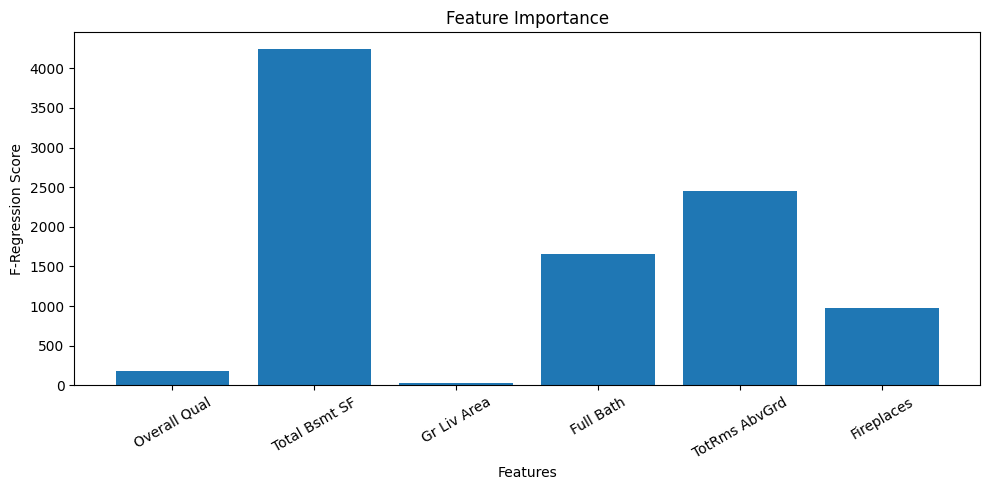

In [13]:
plt.figure(figsize=(10, 5))
plt.bar(best_features, selector.scores_[:6])
plt.xlabel('Features')
plt.ylabel('F-Regression Score')
plt.title('Feature Importance')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [14]:
df_corr = pd.concat([df, y], axis=1, ignore_index=False)
corr_matrix = df_corr.corr()

#AI suggested this. Gonna try it out
# Generate a mask for the upper triangle (optional, for cleaner visual)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) #Ok this was cool! stops from seeing double data!!!

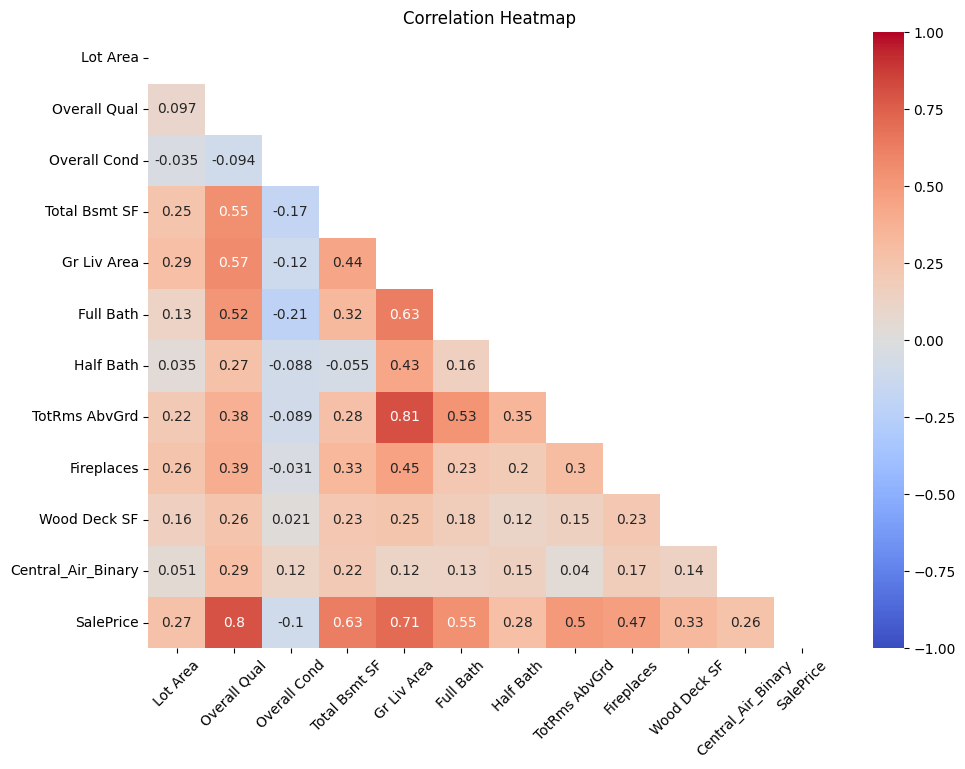

In [15]:
fig, ax = plt.subplots(figsize=(11, 8))  
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, annot=True, ax=ax)
plt.xticks(rotation=45)

ax.set_title('Correlation Heatmap')
plt.show()

<a id="topic-2">Modeling Here</a>

[Back to Top](#top)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, ElasticNet
# from sklearn.metrics import r2_score
from sklearn import metrics  # For evaluation metrics
import xgboost as xgb #pip install xgboost

In [17]:
# Given by the text
columns = ['Gr Liv Area', 'Total Bsmt SF', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'Lot Area', 'Overall Qual', 'SalePrice']


df = pd.read_csv('AmesHousing.txt',
                 sep='\t',
                 usecols=columns)

df = df.dropna(axis=0)
df.isnull().sum()

df.head()

,Lot Area,Overall Qual,Total Bsmt SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,SalePrice
0,31770,6,1080.0,1656,1,7,2,215000
1,11622,5,882.0,896,1,5,0,105000
2,14267,6,1329.0,1329,1,6,0,172000
3,11160,7,2110.0,2110,2,8,2,244000
4,13830,5,928.0,1629,2,6,1,189900


In [18]:
features = ['Gr Liv Area', 'Total Bsmt SF', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces', 'Lot Area', 'Overall Qual']
X = df[features]
y = df['SalePrice']

In [19]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.25, random_state=42)

In [20]:
#MAke a function for repeated metrics so they can all look uniform!!

def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print(f"  MSE: {mse:.2f}")
    print(f"  R-squared: {r2:.2f}")
    print("-----------------")

In [21]:
# Define your models
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
lasso = Lasso(alpha=0.1)
elasticnet = ElasticNet(alpha=0.01, l1_ratio=0.01)
xgb_regr_model = xgb.XGBRegressor()

#Train them allll
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
lasso.fit(X_train, y_train)
elasticnet.fit(X_train, y_train)
xgb_regr_model.fit(X_train, y_train)

evaluate_model(lr, 'Linear Regression')
evaluate_model(dt, 'Decision Tree')
evaluate_model(rf, 'Random Forest')
evaluate_model(lasso, 'Lasso Regression')
evaluate_model(elasticnet, 'ElasticNet Regression')
evaluate_model(xgb_regr_model, 'XGB Regression')

Model: Linear Regression
  MSE: 2137888858.87
  R-squared: 0.71
-----------------
Model: Decision Tree
  MSE: 1433337437.98
  R-squared: 0.80
-----------------
Model: Random Forest
  MSE: 945836819.89
  R-squared: 0.87
-----------------
Model: Lasso Regression
  MSE: 2137893937.41
  R-squared: 0.71
-----------------
Model: ElasticNet Regression
  MSE: 2142169277.65
  R-squared: 0.70
-----------------
Model: XGB Regression
  MSE: 861040364.12
  R-squared: 0.88
-----------------
